# DataScience Term Project 
> ## Team 8
> ## Stellar Classification Dataset - SDSS17

## Abstract

> - In astronomy, the classification of stars is the classification of stars according to their spectral properties.

> - The early classification and distribution of stars in the sky made it clear that they made up our galaxy. As Andromeda was a separate galaxy from our own, more powerful telescopes were created, and numerous galaxies began to be investigated.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

In [ ]:
# read data
df = pd.read_csv('/content/drive/Shareddrives/Data_Science_Term_Project/star_classification.csv')

In [ ]:
# print data columns
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
#print head of the data
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
# print data shape
df.shape

(100000, 18)

In [ ]:
# print data index
df.index

RangeIndex(start=0, stop=100000, step=1)

In [ ]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

## Step 1. Data Preprocessing

- Encoding Object value into numeric value
- Feature selection
- Outliers detection 
- Null/Unusable value detection 

### Encoding non-numerical value, using LabelEncoder

- Due to feature 'Class' is an object data, make ir numerical value using LabelEncoder()

In [ ]:
# Encoding categorical data
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df['class'] = df['class'].astype(int)

In [ ]:
df['class'].unique()

array([0, 1, 2])

### Outlier detection & processing using scipy

- Show outlier examples. 
- There are outlier which value = -9999. 

{'boxes': [<matplotlib.lines.Line2D at 0x7f160cd43ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f160cd50b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f160cd58b50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f160cd58650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f160cd500d0>,
  <matplotlib.lines.Line2D at 0x7f160cd50610>]}

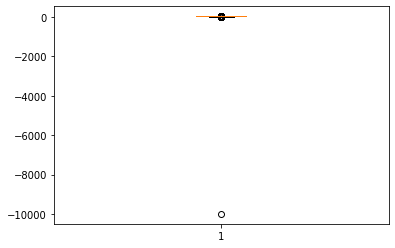

In [ ]:
plt.boxplot(df['u'])

- Remove an outlier by using LocalOutlierFactor function

In [ ]:
# Detect outlier
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df) 

x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

# threshold
threshold2 = -1.5                                            
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

df.drop(outlier_index, inplace=True)

- Check again if outlier has successfully detected and deleted

{'boxes': [<matplotlib.lines.Line2D at 0x7f16098a53d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f16098ab410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f16098b2490>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f16098abf10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f16098a5950>,
  <matplotlib.lines.Line2D at 0x7f16098a5e90>]}

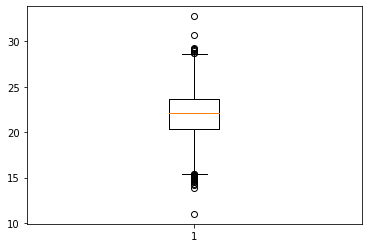

In [ ]:
plt.boxplot(df['u'])

### Null value detection & processing

In [ ]:
# Check Nan value
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
# Print data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84744 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       84744 non-null  float64
 1   alpha        84744 non-null  float64
 2   delta        84744 non-null  float64
 3   u            84744 non-null  float64
 4   g            84744 non-null  float64
 5   r            84744 non-null  float64
 6   i            84744 non-null  float64
 7   z            84744 non-null  float64
 8   run_ID       84744 non-null  int64  
 9   rerun_ID     84744 non-null  int64  
 10  cam_col      84744 non-null  int64  
 11  field_ID     84744 non-null  int64  
 12  spec_obj_ID  84744 non-null  float64
 13  class        84744 non-null  int64  
 14  redshift     84744 non-null  float64
 15  plate        84744 non-null  int64  
 16  MJD          84744 non-null  int64  
 17  fiber_ID     84744 non-null  int64  
dtypes: float64(10), int64(8)
memory usage: 12.3 MB

In [ ]:
# Print data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,84744.0,1.237665e+18,8.413457e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,84744.0,1.781005e+02,9.652741e+01,5.527828e-03,1.281373e+02,1.812894e+02,2.339467e+02,3.599998e+02
delta,84744.0,2.401650e+01,1.961133e+01,-1.763620e+01,4.697749e+00,2.373084e+01,3.980674e+01,7.934308e+01
u,84744.0,2.207506e+01,2.242984e+00,1.099623e+01,2.035037e+01,2.216555e+01,2.367271e+01,3.278139e+01
g,84744.0,2.062455e+01,2.025306e+00,1.267902e+01,1.895932e+01,2.108633e+01,2.211644e+01,3.160224e+01
r,84744.0,1.963953e+01,1.847501e+00,1.174664e+01,1.812524e+01,2.011414e+01,2.102950e+01,2.957186e+01
i,84744.0,1.908065e+01,1.755342e+00,1.129956e+01,1.772288e+01,1.939711e+01,2.038425e+01,3.214147e+01
z,84744.0,1.876577e+01,1.765649e+00,1.089738e+01,1.744519e+01,1.899947e+01,1.992238e+01,2.938374e+01
run_ID,84744.0,4.481306e+03,1.958920e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.323000e+03,8.162000e+03
rerun_ID,84744.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


### Feature selection 

- After plotting each feature, select which feature to use for data analysis.
- By checking each of correlation matrix, we can check feature that which featuer has high-correlation with 'class' feature

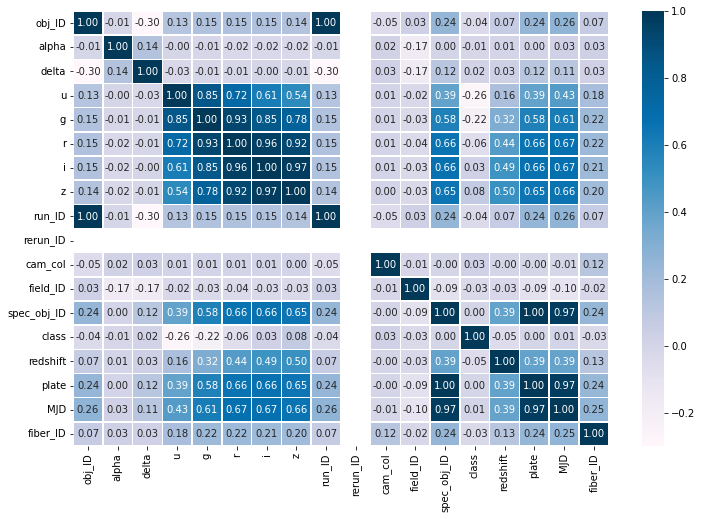

In [ ]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

- Make it numerical value
- > we can find feature that which has high correlation with 'class'

In [ ]:
corr = df.corr()
corr['class'].sort_values()

u             -0.263273
g             -0.215977
r             -0.061292
redshift      -0.045675
run_ID        -0.035730
obj_ID        -0.035727
field_ID      -0.032319
fiber_ID      -0.031720
alpha         -0.013218
spec_obj_ID    0.000070
plate          0.000071
MJD            0.007197
delta          0.015853
cam_col        0.030220
i              0.030710
z              0.081355
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

In [ ]:
# Define function to print plot
def plot(column):
    for i in range(3):
        sns.kdeplot(data=df[df["class"] == i][column], label = le.inverse_transform([i]))
    sns.kdeplot(data=df[column],label = ["All"])
    plt.legend()
  
# Define function to print log scale plot
def log_plot(column):
    for i in range(3):
        sns.kdeplot(data=np.log(df[df["class"] == i][column]), label = le.inverse_transform([i]))
    sns.kdeplot(data=np.log(df[column]),label = ["All"])
    plt.legend();

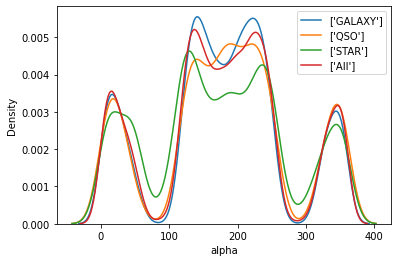

In [ ]:
plot('alpha')

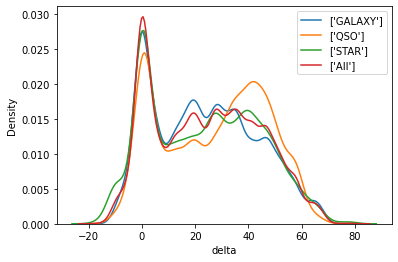

In [ ]:
plot('delta')

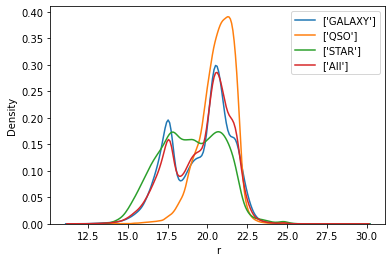

In [ ]:
plot('r')

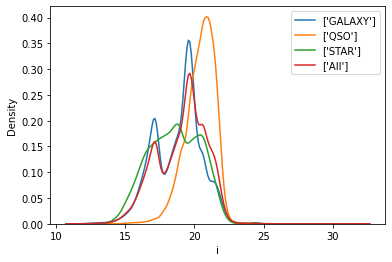

In [ ]:
plot('i')

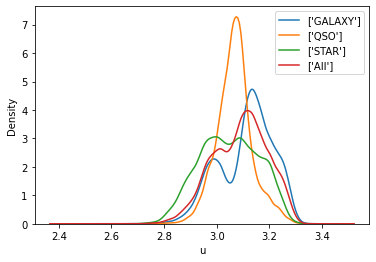

In [ ]:
log_plot('u')

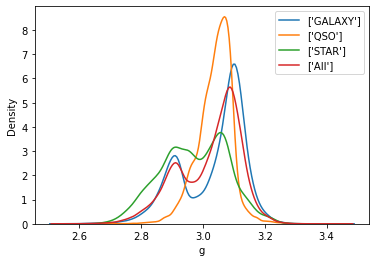

In [ ]:
log_plot('g')

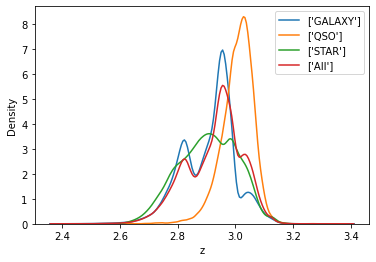

In [ ]:
log_plot('z')

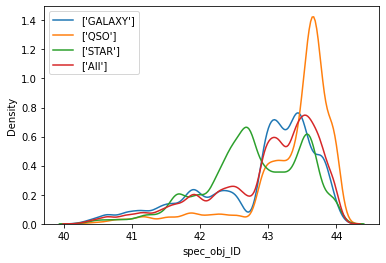

In [ ]:
log_plot('spec_obj_ID')

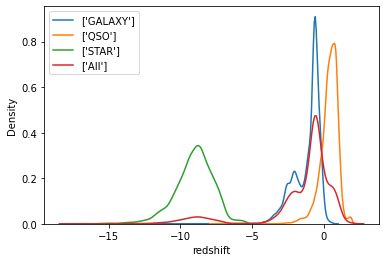

In [ ]:
log_plot('redshift')

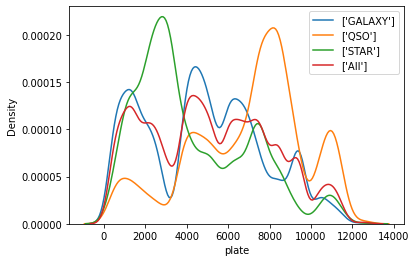

In [ ]:
plot('plate')

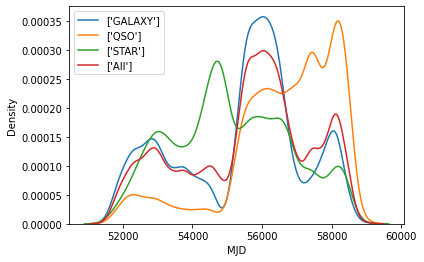

In [ ]:
plot('MJD')

- `From above graph, we can select features for training as [alpha, delta, r, i, u, g, z]`

In [ ]:
# class for y
df = df.drop(['obj_ID','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)
df = df.reset_index().drop(['index'], axis = 1)
df

,alpha,delta,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,0,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,0,0.779136,10445,58158
2,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,0,0.932346,9149,58039
3,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,0,0.116123,6121,56187
4,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,1.246262e+19,1,0.586455,11069,58456
...,...,...,...,...,...,...,...,...,...,...,...,...
84739,317.246996,-0.682254,20.96526,19.81625,19.34186,19.14711,19.05790,1.154061e+18,0,0.175206,1025,53239
84740,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,1.055431e+19,0,0.000000,9374,57749
84741,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,8.586351e+18,0,0.404895,7626,56934
84742,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,3.112008e+18,0,0.143366,2764,54535


## Data Scaling / Normalization 

## Data scaling - Standard

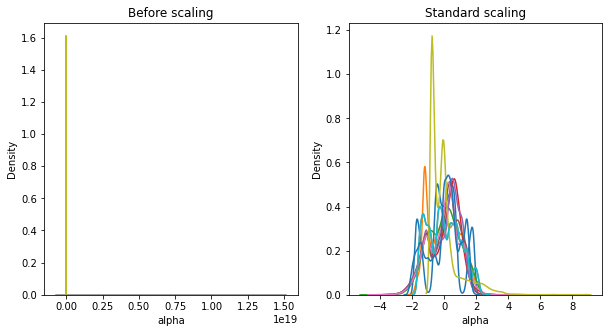

In [ ]:
dfClean_y = df['class']

dfClean_x = df.drop(['class'], axis = 1)

from sklearn.preprocessing import StandardScaler

# Standard Scaling the data
s = StandardScaler()
dfClean_xSScaled = s.fit_transform(dfClean_x)
dfClean_xSScaled = pd.DataFrame(dfClean_xSScaled, columns = ['alpha', 'delta', 'r', 'i', 'u', 'g', 'z','spec_obj_ID','redshift','plate','MJD'])

# Show difference between befor scaling & after standard scaling
fig,(ax1,ax2) = plt.subplots(ncols = 2, figsize = (10,5))
ax1.set_title('Before scaling')
sns.kdeplot(df['alpha'],ax = ax1)
sns.kdeplot(df['delta'],ax = ax1)
sns.kdeplot(df['r'],ax = ax1)
sns.kdeplot(df['i'],ax = ax1)
sns.kdeplot(df['u'],ax = ax1)
sns.kdeplot(df['g'],ax = ax1)
sns.kdeplot(df['z'],ax = ax1)
sns.kdeplot(df['spec_obj_ID'],ax = ax1)
sns.kdeplot(df['redshift'],ax = ax1)
sns.kdeplot(df['plate'],ax = ax1)
sns.kdeplot(df['MJD'],ax = ax1)
ax2.set_title('Standard scaling')
sns.kdeplot(dfClean_xSScaled['alpha'],ax = ax2)
sns.kdeplot(dfClean_xSScaled['delta'],ax = ax2)
sns.kdeplot(dfClean_xSScaled['r'],ax = ax2)
sns.kdeplot(dfClean_xSScaled['i'],ax = ax2)
sns.kdeplot(dfClean_xSScaled['u'],ax = ax2)
sns.kdeplot(dfClean_xSScaled['g'],ax = ax2)
sns.kdeplot(dfClean_xSScaled['z'],ax = ax2)
sns.kdeplot(dfClean_xSScaled['spec_obj_ID'],ax = ax2)
sns.kdeplot(dfClean_xSScaled['redshift'],ax = ax2)
sns.kdeplot(dfClean_xSScaled['plate'],ax = ax2)
sns.kdeplot(dfClean_xSScaled['MJD'],ax = ax2)
plt.show()

## Data Scaling - MinMax

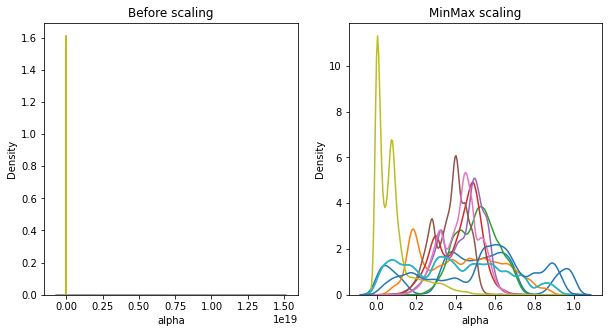

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMax Scaling the data
m = MinMaxScaler()
dfClean_xMScaled = m.fit_transform(dfClean_x)
dfClean_xMScaled = pd.DataFrame(dfClean_xMScaled, columns = ['alpha', 'delta', 'r', 'i', 'u', 'g', 'z','spec_obj_ID','redshift','plate','MJD'])

# Show difference between befor scaling & after minmax scaling
fig,(ax1,ax2) = plt.subplots(ncols = 2, figsize = (10,5))
ax1.set_title('Before scaling')
sns.kdeplot(df['alpha'],ax = ax1)
sns.kdeplot(df['delta'],ax = ax1)
sns.kdeplot(df['r'],ax = ax1)
sns.kdeplot(df['i'],ax = ax1)
sns.kdeplot(df['u'],ax = ax1)
sns.kdeplot(df['g'],ax = ax1)
sns.kdeplot(df['z'],ax = ax1)
sns.kdeplot(df['spec_obj_ID'],ax = ax1)
sns.kdeplot(df['redshift'],ax = ax1)
sns.kdeplot(df['plate'],ax = ax1)
sns.kdeplot(df['MJD'],ax = ax1)
ax2.set_title('MinMax scaling')
sns.kdeplot(dfClean_xMScaled['alpha'],ax = ax2)
sns.kdeplot(dfClean_xMScaled['delta'],ax = ax2)
sns.kdeplot(dfClean_xMScaled['r'],ax = ax2)
sns.kdeplot(dfClean_xMScaled['i'],ax = ax2)
sns.kdeplot(dfClean_xMScaled['u'],ax = ax2)
sns.kdeplot(dfClean_xMScaled['g'],ax = ax2)
sns.kdeplot(dfClean_xMScaled['z'],ax = ax2)
sns.kdeplot(dfClean_xMScaled['spec_obj_ID'],ax = ax2)
sns.kdeplot(dfClean_xMScaled['redshift'],ax = ax2)
sns.kdeplot(dfClean_xMScaled['plate'],ax = ax2)
sns.kdeplot(dfClean_xMScaled['MJD'],ax = ax2)
plt.show()


## Data Scaling - Robust

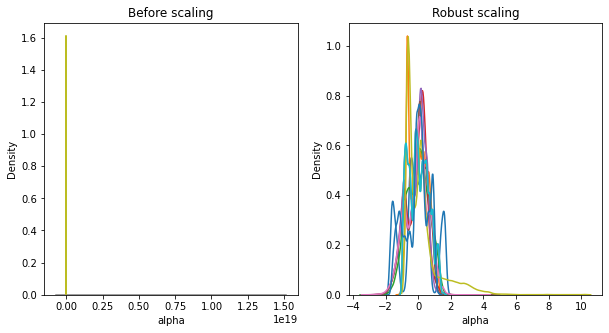

In [ ]:
from sklearn.preprocessing import RobustScaler

#Robust Scaling the data
r = RobustScaler()
dfClean_xRScaled = r.fit_transform(dfClean_x)
dfClean_xRScaled = pd.DataFrame(dfClean_xRScaled, columns = ['alpha', 'delta', 'r', 'i', 'u', 'g', 'z','spec_obj_ID','redshift','plate','MJD'])

# Show difference between befor scaling & after robust scaling
fig,(ax1,ax2) = plt.subplots(ncols = 2, figsize = (10,5))
ax1.set_title('Before scaling')
sns.kdeplot(df['alpha'],ax = ax1)
sns.kdeplot(df['delta'],ax = ax1)
sns.kdeplot(df['r'],ax = ax1)
sns.kdeplot(df['i'],ax = ax1)
sns.kdeplot(df['u'],ax = ax1)
sns.kdeplot(df['g'],ax = ax1)
sns.kdeplot(df['z'],ax = ax1)
sns.kdeplot(df['spec_obj_ID'],ax = ax1)
sns.kdeplot(df['redshift'],ax = ax1)
sns.kdeplot(df['plate'],ax = ax1)
sns.kdeplot(df['MJD'],ax = ax1)
ax2.set_title('Robust scaling')
sns.kdeplot(dfClean_xRScaled['alpha'],ax = ax2)
sns.kdeplot(dfClean_xRScaled['delta'],ax = ax2)
sns.kdeplot(dfClean_xRScaled['r'],ax = ax2)
sns.kdeplot(dfClean_xRScaled['i'],ax = ax2)
sns.kdeplot(dfClean_xRScaled['u'],ax = ax2)
sns.kdeplot(dfClean_xRScaled['g'],ax = ax2)
sns.kdeplot(dfClean_xRScaled['z'],ax = ax2)
sns.kdeplot(dfClean_xRScaled['spec_obj_ID'],ax = ax2)
sns.kdeplot(dfClean_xRScaled['redshift'],ax = ax2)
sns.kdeplot(dfClean_xRScaled['plate'],ax = ax2)
sns.kdeplot(dfClean_xRScaled['MJD'],ax = ax2)
plt.show()


## Select Scaling Method - Standard Scaling

In [ ]:
#Select Standard Scaling
xNorm = pd.DataFrame(dfClean_xSScaled)
xNorm.columns = dfClean_x.columns

## dfNorm: dataFrame with final preprocessing is completed

In [ ]:
dfNorm = pd.concat([xNorm, dfClean_y], axis = 1) 

dfNorm

,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,class
0,-0.439374,0.432310,0.804184,0.815068,0.408921,0.048470,0.015823,0.235787,0.079128,0.235812,0.429938,0
1,-0.344717,0.370078,1.204889,1.089882,1.594004,1.189218,1.613296,1.806218,0.277200,1.806229,1.424803,0
2,1.664206,-1.245172,0.027535,1.556323,1.067441,0.811181,0.274308,1.366952,0.487441,1.366933,1.359178,0
3,1.731975,-0.144440,-1.176065,-1.503124,-1.700720,-1.768065,-1.824360,0.340582,-0.632613,0.340551,0.337841,0
4,-1.604378,-0.642404,-0.269878,0.272401,0.697572,0.870269,0.940146,2.017704,0.012795,2.017742,1.589144,1
...,...,...,...,...,...,...,...,...,...,...,...,...
84739,1.441532,-1.259420,-0.494790,-0.399101,-0.161123,0.037862,0.165452,-1.386832,-0.551537,-1.386806,-1.287914,0
84740,-1.434625,-1.356906,0.041254,1.160973,1.225721,1.267471,1.115697,1.443191,-0.791961,1.443199,1.199249,0
84741,-1.539537,-0.215062,0.274690,0.869865,0.438702,0.385648,0.367849,0.850721,-0.236348,0.850691,0.749795,0
84742,0.481596,-0.424033,-0.403884,-0.668830,-0.776866,-0.792049,-0.800595,-0.797376,-0.595229,-0.797349,-0.573200,0


In [ ]:
dfNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,84744.0,-5.234171e-17,1.000006,-1.845031,-0.517610,0.033037,0.578556,1.884443
delta,84744.0,6.819728e-16,1.000006,-2.123923,-0.985087,-0.014566,0.805164,2.821170
u,84744.0,3.877606e-16,1.000006,-4.939356,-0.768930,0.040344,0.712293,4.773282
g,84744.0,4.499676e-16,1.000006,-3.923147,-0.822218,0.228010,0.736628,5.420294
r,84744.0,1.612109e-15,1.000006,-4.272224,-0.819650,0.256890,0.752355,5.376118
i,84744.0,1.518180e-15,1.000006,-4.432832,-0.773510,0.180286,0.742654,7.440658
z,84744.0,3.224401e-16,1.000006,-4.456399,-0.747936,0.132359,0.655065,6.013669
spec_obj_ID,84744.0,7.023788e-17,1.000006,-1.644099,-0.890888,-0.046865,0.771342,2.518735
redshift,84744.0,1.450499e-16,1.000006,-0.805644,-0.709624,-0.209749,0.174307,8.829151
plate,84744.0,2.811795e-16,1.000006,-1.644080,-0.890903,-0.046884,0.771374,2.518730


In [ ]:
y = dfNorm['class']
X = dfNorm.drop(['class'], axis = 1)

## Separate Train and Test set using

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, stratify = y, random_state = 34)

## Linear regression -  Fit

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

## Linear regression - Evaluation

In [ ]:
for n in [3, 5]:
    kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
    
    # Scoring each sets
    scores = cross_val_score(linreg, X_test, y_test, cv=kfold)
    print('n_splits={}, cross validation score: {}'.format(n, scores))

n_splits=3, cross validation score: [0.26556583 0.25310088 0.24861237]
n_splits=5, cross validation score: [0.26628254 0.25707735 0.26883472 0.23906238 0.25277719]


## Decision tree classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

for n in [3,5]:
  dtc = DecisionTreeClassifier()
  kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
  param_grid = {
              'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  }
  gdtc=GridSearchCV(dtc,param_grid=param_grid,cv=kfold,n_jobs=-1)
  gdtc.fit(X_train, y_train)
  print('n_splits: ',n)
  print('best parameter: ',gdtc.best_params_)
  print('cross validation score: ',gdtc.score(X_test, y_test))

n_splits:  3
best parameter:  {'max_depth': 9}
cross validation score:  0.973410950283197
n_splits:  5
best parameter:  {'max_depth': 9}
cross validation score:  0.9732142857142857


## Decision tree classifier - Confusion Matrix

Text(0.5, 1.0, 'Decision tree classifier')

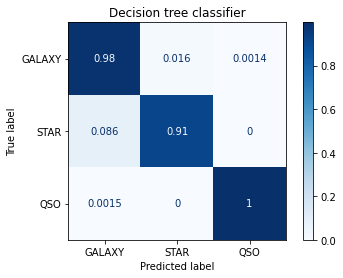

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label=['GALAXY','STAR','QSO']
plot = plot_confusion_matrix(gdtc, 
                             X_test, y_test, 
                             display_labels=label, 
                             cmap=plt.cm.Blues, 
                             normalize='true') 
plot.ax_.set_title('Decision tree classifier')

## K-Neighbors classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for n in [3,5]:
  knn = KNeighborsClassifier()
  kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
  param_grid = {
              'n_neighbors': [None, 2, 3, 4, 5, 6],
  }
  gknn=GridSearchCV(knn,param_grid=param_grid,cv=kfold,n_jobs=-1)
  gknn.fit(X_train, y_train)
  print('n_splits: ',n)
  print('best parameter: ',gknn.best_params_)
  print('cross validation score: ',gknn.score(X_test, y_test))

n_splits:  3
best parameter:  {'n_neighbors': 3}
cross validation score:  0.9426919446192574
n_splits:  5
best parameter:  {'n_neighbors': 3}
cross validation score:  0.9426919446192574


## K-Neighbors classifier - Confusion Matrix

Text(0.5, 1.0, 'K-Neighbors classifier')

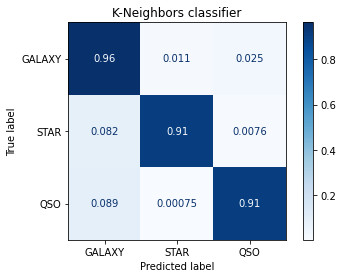

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label=['GALAXY','STAR','QSO']
plot = plot_confusion_matrix(gknn,
                             X_test, y_test,
                             display_labels=label,
                             cmap=plt.cm.Blues,
                             normalize='true') 
plot.ax_.set_title('K-Neighbors classifier')

## Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for n in [3,5]:
  rf = RandomForestClassifier()
  kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
  param_grid = {
              "n_estimators": [10,100,200],
              "criterion": ["entropy"],
              "max_depth": [None, 2, 3, 4, 5],
  }
  grf=GridSearchCV(rf,param_grid=param_grid,cv=kfold,n_jobs=-1)
  grf.fit(X_train, y_train)
  print('n_splits: ',n)
  print('best parameter: ',grf.best_params_)
  print('cross validation score: ',grf.score(X_test, y_test))

n_splits:  3
best parameter:  {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}
cross validation score:  0.9790355569540592
n_splits:  5
best parameter:  {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}
cross validation score:  0.979153555695406


## Random forest classifier - Classification

Text(0.5, 1.0, 'Random forest classifier')

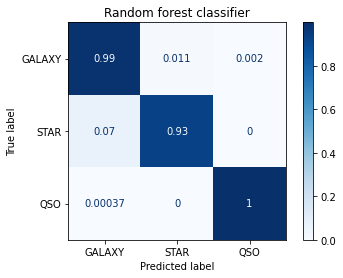

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label=['GALAXY','STAR','QSO']
plot = plot_confusion_matrix(grf,
                             X_test, y_test,
                             display_labels=label,
                             cmap=plt.cm.Blues,
                             normalize='true') 
plot.ax_.set_title('Random forest classifier')

## Bagging classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

for n in [3,5]:
  bg = BaggingClassifier()
  kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
  param_grid = {
              'n_estimators': [10, 50, 100],
              'max_samples': [1, 5, 10],
              'max_features': [1, 5, 10]
  }
  gbg=GridSearchCV(bg,param_grid=param_grid,cv=kfold,n_jobs=-1)
  gbg.fit(X_train, y_train)
  print('n_splits: ',n)
  print('best parameter: ',gbg.best_params_)
  print('cross validation score: ',gbg.score(X_test, y_test))


n_splits:  3
best parameter:  {'max_features': 10, 'max_samples': 10, 'n_estimators': 100}
cross validation score:  0.8919918187539333
n_splits:  5
best parameter:  {'max_features': 10, 'max_samples': 10, 'n_estimators': 100}
cross validation score:  0.9251887979861548


## Bagging classifier - Confusion Matrix

Text(0.5, 1.0, 'Random forest classifier')

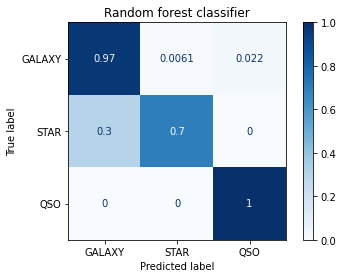

In [ ]:
label=['GALAXY','STAR','QSO']
plot = plot_confusion_matrix(gbg,
                             X_test, y_test,
                             display_labels=label,
                             cmap=plt.cm.Blues,
                             normalize='true') 
plot.ax_.set_title('Random forest classifier')

## Adaboost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

for n in [3,5]:
  ad = AdaBoostClassifier()
  kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
  param_grid = {
              'n_estimators': [25, 50, 100, 200],
              'learning_rate': [0.01, 0.1, 1.0]
  }
  gad=GridSearchCV(ad,param_grid=param_grid,cv=kfold,n_jobs=-1)
  gad.fit(X_train, y_train)
  print('n_splits: ',n)
  print('best parameter: ',gad.best_params_)
  print('cross validation score: ',gad.score(X_test, y_test))

n_splits:  3
best parameter:  {'learning_rate': 0.01, 'n_estimators': 25}
cross validation score:  0.8037287602265576
n_splits:  5
best parameter:  {'learning_rate': 0.01, 'n_estimators': 25}
cross validation score:  0.8037287602265576


## Adaboost classifier - Confusion Matrix

Text(0.5, 1.0, 'Random forest classifier')

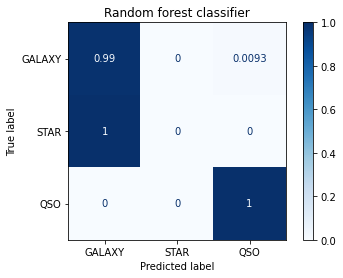

In [ ]:
label=['GALAXY','STAR','QSO']
plot = plot_confusion_matrix(gad,
                             X_test, y_test,
                             display_labels=label,
                             cmap=plt.cm.Blues,
                             normalize='true') 
plot.ax_.set_title('Random forest classifier')

## Select Scaling Method - MinMax Scaling

In [ ]:
#Select MinMax Scaling
xNorm = pd.DataFrame(dfClean_xMScaled)
xNorm.columns = dfClean_x.columns

## dfNorm: dataFrame with final preprocessing is completed

In [ ]:
dfNorm = pd.concat([xNorm, dfClean_y], axis = 1) 

dfNorm

,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,class
0,0.376905,0.516923,0.591347,0.507117,0.485176,0.377421,0.427144,0.451588,0.091831,0.451592,0.648007,0
1,0.402286,0.504339,0.632603,0.536529,0.608004,0.473496,0.579719,0.828838,0.112389,0.828841,0.894320,0
2,0.940947,0.177702,0.511384,0.586451,0.553428,0.441657,0.451832,0.723318,0.134210,0.723312,0.878072,0
3,0.959118,0.400292,0.387463,0.259008,0.266523,0.224430,0.251387,0.476762,0.017959,0.476753,0.625205,0
4,0.064527,0.299594,0.480763,0.449037,0.515093,0.446634,0.515426,0.879642,0.084946,0.879651,0.935008,1
...,...,...,...,...,...,...,...,...,...,...,...,...
84739,0.881240,0.174820,0.457606,0.377168,0.426094,0.376527,0.441435,0.061801,0.026374,0.061803,0.222693,0
84740,0.110044,0.155107,0.512797,0.544138,0.569833,0.480087,0.532193,0.741632,0.001420,0.741633,0.838476,0
84741,0.081913,0.386011,0.536831,0.512981,0.488263,0.405818,0.460766,0.599308,0.059087,0.599300,0.727198,0
84742,0.623848,0.343753,0.466966,0.348300,0.362275,0.306631,0.349167,0.203401,0.021839,0.203404,0.399645,0


In [ ]:
dfNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,84744.0,0.494716,0.268136,0.0,0.355927,0.503574,0.649847,1.0
delta,84744.0,0.429501,0.202222,0.0,0.230296,0.426555,0.592322,1.0
u,84744.0,0.508549,0.102959,0.0,0.429381,0.512703,0.581886,1.0
g,84744.0,0.419882,0.107028,0.0,0.331883,0.444286,0.498722,1.0
r,84744.0,0.442794,0.103645,0.0,0.357841,0.469419,0.520771,1.0
i,84744.0,0.373339,0.084222,0.0,0.308193,0.388522,0.435886,1.0
z,84744.0,0.425632,0.095511,0.0,0.354197,0.438274,0.488198,1.0
spec_obj_ID,84744.0,0.394947,0.240222,0.0,0.180937,0.383689,0.580239,1.0
redshift,84744.0,0.083618,0.103791,0.0,0.009966,0.061848,0.101710,1.0
plate,84744.0,0.394945,0.240224,0.0,0.180930,0.383682,0.580246,1.0


In [ ]:
y = dfNorm['class']
X = dfNorm.drop(['class'], axis = 1)

## Separate Train and Test set using

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, stratify = y, random_state = 34)

## Linear regression -  Fit

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

## Linear regression - Evaluation

In [ ]:
for n in [3, 5]:
    kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
    
    # Scoring each sets
    scores = cross_val_score(linreg, X_test, y_test, cv=kfold)
    print('n_splits={}, cross validation score: {}'.format(n, scores))

n_splits=3, cross validation score: [0.26556583 0.25310088 0.24861237]
n_splits=5, cross validation score: [0.26628254 0.25707735 0.26883472 0.23906238 0.25277719]


## Decision tree classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

for n in [3,5]:
  dtc = DecisionTreeClassifier()
  kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
  param_grid = {
              'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  }
  gdtc=GridSearchCV(dtc,param_grid=param_grid,cv=kfold,n_jobs=-1)
  gdtc.fit(X_train, y_train)
  print('n_splits: ',n)
  print('best parameter: ',gdtc.best_params_)
  print('cross validation score: ',gdtc.score(X_test, y_test))

n_splits:  3
best parameter:  {'max_depth': 9}
cross validation score:  0.970618313404657
n_splits:  5
best parameter:  {'max_depth': 9}
cross validation score:  0.970460981749528


## Decision tree classifier - Confusion Matrix

Text(0.5, 1.0, 'Decision tree classifier')

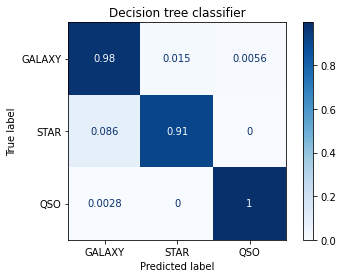

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label=['GALAXY','STAR','QSO']
plot = plot_confusion_matrix(gdtc, 
                             X_test, y_test, 
                             display_labels=label, 
                             cmap=plt.cm.Blues, 
                             normalize='true') 
plot.ax_.set_title('Decision tree classifier')

## K-Neighbors classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for n in [3,5]:
  knn = KNeighborsClassifier()
  kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
  param_grid = {
              'n_neighbors': [None, 2, 3, 4, 5, 6],
  }
  gknn=GridSearchCV(knn,param_grid=param_grid,cv=kfold,n_jobs=-1)
  gknn.fit(X_train, y_train)
  print('n_splits: ',n)
  print('best parameter: ',gknn.best_params_)
  print('cross validation score: ',gknn.score(X_test, y_test))

n_splits:  3
best parameter:  {'n_neighbors': 3}
cross validation score:  0.9327013845185651
n_splits:  5
best parameter:  {'n_neighbors': 3}
cross validation score:  0.9327013845185651


## K-Neighbors classifier - Confusion Matrix

Text(0.5, 1.0, 'K-Neighbors classifier')

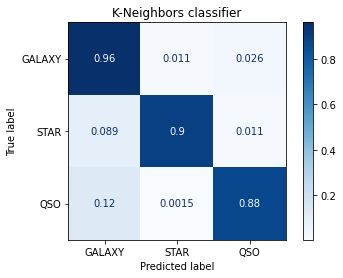

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label=['GALAXY','STAR','QSO']
plot = plot_confusion_matrix(gknn,
                             X_test, y_test,
                             display_labels=label,
                             cmap=plt.cm.Blues,
                             normalize='true') 
plot.ax_.set_title('K-Neighbors classifier')

## Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for n in [3,5]:
  rf = RandomForestClassifier()
  kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
  param_grid = {
              "n_estimators": [10,100,200],
              "criterion": ["entropy"],
              "max_depth": [None, 2, 3, 4, 5],
  }
  grf=GridSearchCV(rf,param_grid=param_grid,cv=kfold,n_jobs=-1)
  grf.fit(X_train, y_train)
  print('n_splits: ',n)
  print('best parameter: ',grf.best_params_)
  print('cross validation score: ',grf.score(X_test, y_test))

n_splits:  3
best parameter:  {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}
cross validation score:  0.977934235368156
n_splits:  5
best parameter:  {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}
cross validation score:  0.9775802391441158


## Random forest classifier - Classification

Text(0.5, 1.0, 'Random forest classifier')

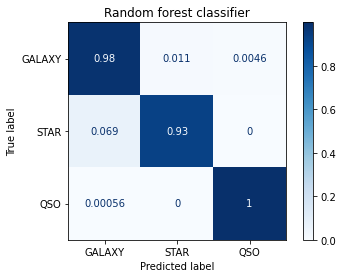

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label=['GALAXY','STAR','QSO']
plot = plot_confusion_matrix(grf,
                             X_test, y_test,
                             display_labels=label,
                             cmap=plt.cm.Blues,
                             normalize='true') 
plot.ax_.set_title('Random forest classifier')

## Bagging classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

for n in [3,5]:
  bg = BaggingClassifier()
  kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
  param_grid = {
              'n_estimators': [10, 50, 100],
              'max_samples': [1, 5, 10],
              'max_features': [1, 5, 10]
  }
  gbg=GridSearchCV(bg,param_grid=param_grid,cv=kfold,n_jobs=-1)
  gbg.fit(X_train, y_train)
  print('n_splits: ',n)
  print('best parameter: ',gbg.best_params_)
  print('cross validation score: ',gbg.score(X_test, y_test))


n_splits:  3
best parameter:  {'max_features': 10, 'max_samples': 10, 'n_estimators': 100}
cross validation score:  0.8938797986154814
n_splits:  5
best parameter:  {'max_features': 10, 'max_samples': 10, 'n_estimators': 100}
cross validation score:  0.9119336060415355


## Bagging classifier - Confusion Matrix

Text(0.5, 1.0, 'Random forest classifier')

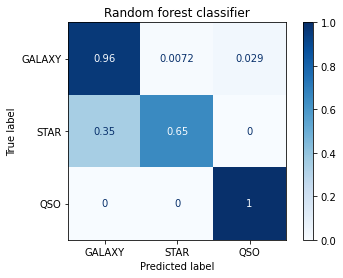

In [ ]:
label=['GALAXY','STAR','QSO']
plot = plot_confusion_matrix(gbg,
                             X_test, y_test,
                             display_labels=label,
                             cmap=plt.cm.Blues,
                             normalize='true') 
plot.ax_.set_title('Random forest classifier')

## Adaboost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

for n in [3,5]:
  ad = AdaBoostClassifier()
  kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
  param_grid = {
              'n_estimators': [25, 50, 100, 200],
              'learning_rate': [0.01, 0.1, 1.0]
  }
  gad=GridSearchCV(ad,param_grid=param_grid,cv=kfold,n_jobs=-1)
  gad.fit(X_train, y_train)
  print('n_splits: ',n)
  print('best parameter: ',gad.best_params_)
  print('cross validation score: ',gad.score(X_test, y_test))

n_splits:  3
best parameter:  {'learning_rate': 0.01, 'n_estimators': 25}
cross validation score:  0.8037287602265576
n_splits:  5
best parameter:  {'learning_rate': 0.01, 'n_estimators': 25}
cross validation score:  0.8037287602265576


## Adaboost classifier - Confusion Matrix

Text(0.5, 1.0, 'Random forest classifier')

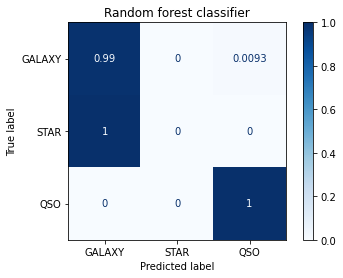

In [ ]:
label=['GALAXY','STAR','QSO']
plot = plot_confusion_matrix(gad,
                             X_test, y_test,
                             display_labels=label,
                             cmap=plt.cm.Blues,
                             normalize='true') 
plot.ax_.set_title('Random forest classifier')

## Select Scaling Method - Robust Scaling

In [ ]:
#Select Robust Scaling
xNorm = pd.DataFrame(dfClean_xRScaled)
xNorm.columns = dfClean_x.columns

## dfNorm: dataFrame with final preprocessing is completed

In [ ]:
dfNorm = pd.concat([xNorm, dfClean_y], axis = 1) 

dfNorm

,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,class
0,-0.430967,0.249617,0.515682,0.376598,0.096711,-0.086940,-0.083062,0.170044,0.326810,0.170065,0.190625,0
1,-0.344613,0.214855,0.786205,0.552891,0.850578,0.665451,1.055550,1.114818,0.550891,1.114804,0.895312,0
2,1.488068,-0.687393,-0.008648,0.852113,0.515616,0.416113,0.101175,0.850555,0.788738,0.850530,0.848828,0
3,1.549892,-0.072545,-0.821219,-1.110522,-1.245294,-1.285052,-1.394668,0.233089,-0.478390,0.233075,0.125391,0
4,-1.493766,-0.350698,-0.209437,0.028477,0.280331,0.455085,0.575757,1.242048,0.251767,1.242047,1.011719,1
...,...,...,...,...,...,...,...,...,...,...,...,...
84739,1.284929,-0.695352,-0.361278,-0.402292,-0.265911,-0.093937,0.023587,-0.806126,-0.386667,-0.806077,-1.026172,0
84740,-1.338905,-0.749806,0.000614,0.598496,0.616302,0.717063,0.700882,0.896420,-0.658662,0.896411,0.735547,0
84741,-1.434614,-0.111993,0.158211,0.411750,0.115656,0.135449,0.167847,0.539990,-0.030091,0.539967,0.417187,0
84742,0.409207,-0.228720,-0.299906,-0.575323,-0.657604,-0.641313,-0.664971,-0.451508,-0.436097,-0.451468,-0.519922,0


In [ ]:
dfNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,84744.0,-0.030138,0.912276,-1.713306,-0.502339,0.000000e+00,0.497661,1.688984
delta,84744.0,0.008136,0.558584,-1.178246,-0.542115,5.059540e-17,0.457885,1.583988
u,84744.0,-0.027237,0.675122,-3.361883,-0.546355,0.000000e+00,0.453645,3.195290
g,84744.0,-0.146268,0.641504,-2.662968,-0.673721,5.626501e-16,0.326279,3.330851
r,84744.0,-0.163416,0.636134,-2.881106,-0.684820,0.000000e+00,0.315180,3.256495
i,84744.0,-0.118909,0.659563,-3.042625,-0.629085,6.674603e-16,0.370915,4.788646
z,84744.0,-0.094340,0.712762,-3.270674,-0.627437,0.000000e+00,0.372563,4.191951
spec_obj_ID,84744.0,0.028194,0.601605,-0.960898,-0.507765,0.000000e+00,0.492235,1.543469
redshift,84744.0,0.237291,1.131316,-0.674140,-0.565513,0.000000e+00,0.434487,10.225790
plate,84744.0,0.028205,0.601588,-0.960848,-0.507749,0.000000e+00,0.492251,1.543434


In [ ]:
y = dfNorm['class']
X = dfNorm.drop(['class'], axis = 1)

## Separate Train and Test set using

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, stratify = y, random_state = 34)

## Linear regression -  Fit

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

## Linear regression - Evaluation

In [ ]:
for n in [3, 5]:
    kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
    
    # Scoring each sets
    scores = cross_val_score(linreg, X_test, y_test, cv=kfold)
    print('n_splits={}, cross validation score: {}'.format(n, scores))

n_splits=3, cross validation score: [0.26556583 0.25310088 0.24861237]
n_splits=5, cross validation score: [0.26628254 0.25707735 0.26883472 0.23906238 0.25277719]


## Decision tree classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

for n in [3,5]:
  dtc = DecisionTreeClassifier()
  kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
  param_grid = {
              'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  }
  gdtc=GridSearchCV(dtc,param_grid=param_grid,cv=kfold,n_jobs=-1)
  gdtc.fit(X_train, y_train)
  print('n_splits: ',n)
  print('best parameter: ',gdtc.best_params_)
  print('cross validation score: ',gdtc.score(X_test, y_test))

n_splits:  3
best parameter:  {'max_depth': 9}
cross validation score:  0.9735289490245438
n_splits:  5
best parameter:  {'max_depth': 9}
cross validation score:  0.9732536186280679


## Decision tree classifier - Confusion Matrix

Text(0.5, 1.0, 'Decision tree classifier')

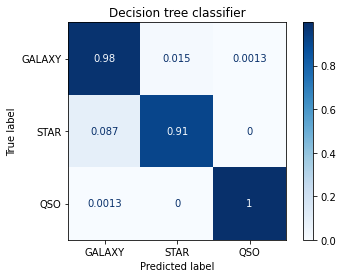

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label=['GALAXY','STAR','QSO']
plot = plot_confusion_matrix(gdtc, 
                             X_test, y_test, 
                             display_labels=label, 
                             cmap=plt.cm.Blues, 
                             normalize='true') 
plot.ax_.set_title('Decision tree classifier')

## K-Neighbors classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for n in [3,5]:
  knn = KNeighborsClassifier()
  kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
  param_grid = {
              'n_neighbors': [None, 2, 3, 4, 5, 6],
  }
  gknn=GridSearchCV(knn,param_grid=param_grid,cv=kfold,n_jobs=-1)
  gknn.fit(X_train, y_train)
  print('n_splits: ',n)
  print('best parameter: ',gknn.best_params_)
  print('cross validation score: ',gknn.score(X_test, y_test))

n_splits:  3
best parameter:  {'n_neighbors': 3}
cross validation score:  0.9510698552548773
n_splits:  5
best parameter:  {'n_neighbors': 3}
cross validation score:  0.9510698552548773


## K-Neighbors classifier - Confusion Matrix

Text(0.5, 1.0, 'K-Neighbors classifier')

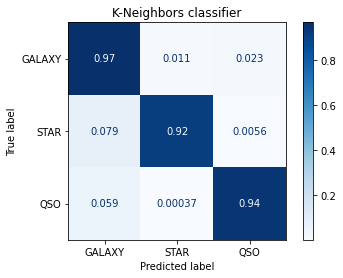

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label=['GALAXY','STAR','QSO']
plot = plot_confusion_matrix(gknn,
                             X_test, y_test,
                             display_labels=label,
                             cmap=plt.cm.Blues,
                             normalize='true') 
plot.ax_.set_title('K-Neighbors classifier')

## Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for n in [3,5]:
  rf = RandomForestClassifier()
  kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
  param_grid = {
              "n_estimators": [10,100,200],
              "criterion": ["entropy"],
              "max_depth": [None, 2, 3, 4, 5],
  }
  grf=GridSearchCV(rf,param_grid=param_grid,cv=kfold,n_jobs=-1)
  grf.fit(X_train, y_train)
  print('n_splits: ',n)
  print('best parameter: ',grf.best_params_)
  print('cross validation score: ',grf.score(X_test, y_test))

n_splits:  3
best parameter:  {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}
cross validation score:  0.9790748898678414
n_splits:  5
best parameter:  {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}
cross validation score:  0.9792715544367526


## Random forest classifier - Classification

Text(0.5, 1.0, 'Random forest classifier')

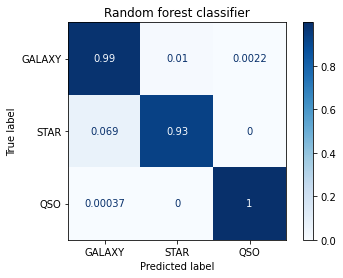

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label=['GALAXY','STAR','QSO']
plot = plot_confusion_matrix(grf,
                             X_test, y_test,
                             display_labels=label,
                             cmap=plt.cm.Blues,
                             normalize='true') 
plot.ax_.set_title('Random forest classifier')

## Bagging classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

for n in [3,5]:
  bg = BaggingClassifier()
  kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
  param_grid = {
              'n_estimators': [10, 50, 100],
              'max_samples': [1, 5, 10],
              'max_features': [1, 5, 10]
  }
  gbg=GridSearchCV(bg,param_grid=param_grid,cv=kfold,n_jobs=-1)
  gbg.fit(X_train, y_train)
  print('n_splits: ',n)
  print('best parameter: ',gbg.best_params_)
  print('cross validation score: ',gbg.score(X_test, y_test))


n_splits:  3
best parameter:  {'max_features': 10, 'max_samples': 10, 'n_estimators': 100}
cross validation score:  0.9198001887979862
n_splits:  5
best parameter:  {'max_features': 10, 'max_samples': 10, 'n_estimators': 50}
cross validation score:  0.8914411579609818


## Bagging classifier - Confusion Matrix

Text(0.5, 1.0, 'Random forest classifier')

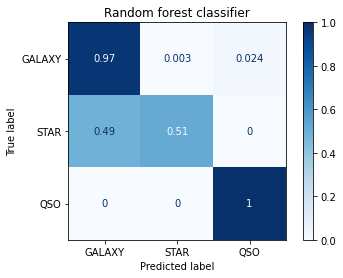

In [ ]:
label=['GALAXY','STAR','QSO']
plot = plot_confusion_matrix(gbg,
                             X_test, y_test,
                             display_labels=label,
                             cmap=plt.cm.Blues,
                             normalize='true') 
plot.ax_.set_title('Random forest classifier')

## Adaboost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

for n in [3,5]:
  ad = AdaBoostClassifier()
  kfold = KFold(n_splits = n, random_state = 0, shuffle = True)
  param_grid = {
              'n_estimators': [25, 50, 100, 200],
              'learning_rate': [0.01, 0.1, 1.0]
  }
  gad=GridSearchCV(ad,param_grid=param_grid,cv=kfold,n_jobs=-1)
  gad.fit(X_train, y_train)
  print('n_splits: ',n)
  print('best parameter: ',gad.best_params_)
  print('cross validation score: ',gad.score(X_test, y_test))

n_splits:  3
best parameter:  {'learning_rate': 0.01, 'n_estimators': 25}
cross validation score:  0.8037287602265576
n_splits:  5
best parameter:  {'learning_rate': 0.01, 'n_estimators': 25}
cross validation score:  0.8037287602265576


## Adaboost classifier - Confusion Matrix

Text(0.5, 1.0, 'Random forest classifier')

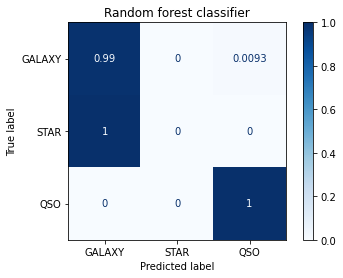

In [ ]:
label=['GALAXY','STAR','QSO']
plot = plot_confusion_matrix(gad,
                             X_test, y_test,
                             display_labels=label,
                             cmap=plt.cm.Blues,
                             normalize='true') 
plot.ax_.set_title('Random forest classifier')